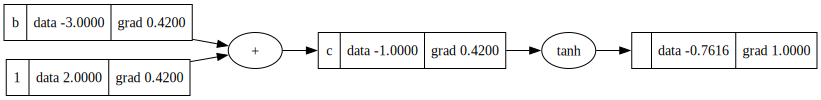

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

#this is all from the first lecture of Andrej Karpathy's "building micrograd" video.
class Value:
    def __init__(self, data, children=(), op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self.prev = set(children)
        self.op = op
        self.label = label
        self.children = children
    
    #define the toString method, essentially
    def __repr__(self):
        return f"Value(data=",self.data,")"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        #go one variable at a time, applying the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward()
        

    

#write a value class

#this class stores data, 


#this class has methods to add, multiply, and activate (say, tanh activation)

#write in the visualization part

def trace(root):
    #build set of nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #create rectangular record for values in graph
        dot.node(name = uid, label = "{%s |  data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n.op:
            #if this value is the result of an operation, display that operation
            dot.node(name = uid + n.op, label = n.op)
            #then connect this node to it
            dot.edge(uid + n.op, uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)
    
    return dot

a = Value(2.0, label='1')
b = Value(-3.0, label = 'b')
c = a+b; c.label = 'c'
d = c.tanh()
d.backward()
d
d_dot = draw_dot(d)
d_dot
# c


#start HERE https://youtu.be/VMj-3S1tku0?feature=shared&t=3360
